In [66]:
import newsgroups
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Load and preprocess data

In [67]:
data = newsgroups.load()

In [68]:
data

,text,group
0,morgan and guzman will have era's 1 run higher...,rec.sport.baseball
1,"Well, I just got my Centris 610 yesterday. It...",comp.sys.mac.hardware
2,History and classical methods. Modern methods....,sci.crypt
3,ATTENTION: Mac Quadra owners: Many storage ind...,comp.sys.mac.hardware
4,To show that the examples I and others have pr...,alt.atheism
...,...,...
18841,Why are circuit boards green? The material us...,sci.electronics
18842,bike. Luckily the guy stops a foot behind my ...,rec.motorcycles
18843,We were told that the resolution on the 5FGe c...,comp.sys.mac.hardware
18844,CAD Setup For Sale: G486PLB Local Bus Motherbo...,misc.forsale


# Split all data into train and test set

In [69]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data.group)

In [70]:
print(f"Train set shape: {train.shape}")
print(f"Train set shape: {test.shape}")

Train set shape: (15076, 2)
Train set shape: (3770, 2)


#### Train group values ount

In [71]:
train.group.value_counts()

rec.sport.hockey            799
soc.religion.christian      798
rec.motorcycles             797
rec.sport.baseball          795
sci.crypt                   793
rec.autos                   792
sci.med                     792
sci.space                   790
comp.windows.x              790
comp.os.ms-windows.misc     788
sci.electronics             787
comp.sys.ibm.pc.hardware    786
misc.forsale                780
comp.graphics               778
comp.sys.mac.hardware       770
talk.politics.mideast       752
talk.politics.guns          728
alt.atheism                 639
talk.politics.misc          620
talk.religion.misc          502
Name: group, dtype: int64

#### Test group values count

In [72]:
test.group.value_counts()

rec.sport.hockey            200
rec.motorcycles             199
rec.sport.baseball          199
soc.religion.christian      199
rec.autos                   198
sci.crypt                   198
sci.med                     198
comp.windows.x              198
sci.electronics             197
sci.space                   197
comp.os.ms-windows.misc     197
comp.sys.ibm.pc.hardware    196
comp.graphics               195
misc.forsale                195
comp.sys.mac.hardware       193
talk.politics.mideast       188
talk.politics.guns          182
alt.atheism                 160
talk.politics.misc          155
talk.religion.misc          126
Name: group, dtype: int64

# Tf-Idf text encoding

In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10).fit(train.text)
len(tfidf.vocabulary_)

10

In [199]:
X_train = tfidf.transform(train.text).toarray()
print('X_train shape: %s' % (X_train.shape,))

X_test = tfidf.transform(test.text).toarray()
print('X_test shape: %s' % (X_test.shape,))

X_train shape: (15076, 10)
X_test shape: (3770, 10)


# Labels encoding

In [200]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(train.group)

#### Known labels

In [201]:
label_encoder.classes_

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

#### Convert labels using encoder:

In [202]:
Y_train = label_encoder.transform(train.group)
print('Y_train shape: %s' % (Y_train.shape,))

Y_test = label_encoder.transform(test.group)
print('Y_test shape: %s' % (Y_test.shape,))

Y_train shape: (15076,)
Y_test shape: (3770,)


# Naive Bayes

In [203]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, Y_train)

#### Test report

In [204]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, clf.predict(X_test), target_names=label_encoder.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.12      0.01      0.01       160
           comp.graphics       0.11      0.02      0.03       195
 comp.os.ms-windows.misc       0.09      0.10      0.10       197
comp.sys.ibm.pc.hardware       0.13      0.18      0.15       196
   comp.sys.mac.hardware       0.05      0.01      0.02       193
          comp.windows.x       0.09      0.10      0.10       198
            misc.forsale       0.18      0.33      0.23       195
               rec.autos       0.10      0.03      0.05       198
         rec.motorcycles       0.10      0.26      0.14       199
      rec.sport.baseball       0.07      0.06      0.06       199
        rec.sport.hockey       0.11      0.40      0.18       200
               sci.crypt       0.10      0.13      0.11       198
         sci.electronics       0.00      0.00      0.00       197
                 sci.med       0.11      0.16      0.13       198
         

C:\Users\vsere\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion matrix

In [205]:
from sklearn.metrics import confusion_matrix


cm = pd.DataFrame(data = confusion_matrix(Y_test, clf.predict(X_test)), 
                  index = label_encoder.classes_, 
                  columns= label_encoder.classes_)
cm

,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
alt.atheism,1,0,19,2,0,6,7,3,30,5,9,9,1,15,7,39,1,6,0,0
comp.graphics,1,3,17,17,0,18,25,2,20,9,29,13,0,22,1,14,0,4,0,0
comp.os.ms-windows.misc,1,1,20,25,1,15,25,2,29,1,17,10,2,18,5,20,1,4,0,0
comp.sys.ibm.pc.hardware,0,2,20,35,5,14,13,3,23,7,28,16,2,17,1,9,0,1,0,0
comp.sys.mac.hardware,0,2,11,31,2,14,16,4,30,10,35,14,0,11,1,9,0,3,0,0
comp.windows.x,0,5,15,12,4,20,28,3,16,6,35,18,1,15,2,15,1,2,0,0
misc.forsale,1,2,7,6,0,10,65,1,30,2,36,7,0,10,1,6,0,11,0,0
rec.autos,0,2,8,23,2,8,21,6,37,11,42,10,1,7,0,15,1,4,0,0
rec.motorcycles,0,1,16,15,1,12,21,2,51,5,37,8,2,5,4,12,0,7,0,0
rec.sport.baseball,0,1,7,12,6,9,22,4,19,11,58,12,0,7,2,27,1,1,0,0


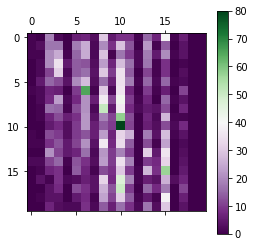

In [206]:
plt.matshow(cm, cmap=plt.cm.PRGn)
plt.colorbar()

In [207]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, clf.predict(X_test))

0.11405835543766578

# Custom Neural Network

In [226]:
class NeuralNet:
    """
    NN for binary classification
    Attributes:
    ...
    """
    # hidden_layer_sizes=(100, 50,)
    def __init__(self, hidden_layer_sizes, normalize = True, learning_rate = 0.01, num_iter = 30000, batch_size=64, optimization='', momentum=0.9):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.normalize = normalize
        self.hidden_layer_sizes = hidden_layer_sizes
        self.optimization = optimization
        self.momentum = momentum
        self.batch_size = batch_size
        
    def __normalize(self, X, mean = None, std = None):
        """
        Зверніть увагу, що нормалізація вхідних даних є дуже важливою для швидкодії нейронних мереж.
        """
        n = X.shape[0]
    
        if mean is None:   
            mean = np.zeros([n, 1])
        if std is None:
            std  = np.ones([n, 1])
        
        for i in range(n):
            if (np.std(X[:, i]) != 0):
                if mean is None:
                    mean[i] = np.mean(X[:, i])
                if std is None:
                    std[i] = np.std(X[:, i])
        
        X_new = (X - mean) / std
        return X_new, mean, std
    

    def __sigmoid(self, Z):
        """
        В наступних практичних потрібно буде додати підтримку й інших активаційних функцій - це один з гіперпараметрів. 
        Їх можна вибирати для всіх шарів одночасно або мати різні активаційні функції на кожному з них.
        """
        return 1 / (1 + np.exp(-Z))
    
    def __sigmoid_derivative(self, Z):
        z = self.__sigmoid(Z)
        return np.multiply(z, (1 - z))
    
    def __softmax(self, Z):
        exp_z = np.exp(Z)
        return exp_z / exp_z.sum(axis=0, keepdims=True)
    
    def __stable_softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / exps.sum(axis=0, keepdims=True)
    
    def __cross_entropy(self, A, Y):
        return - np.sum(Y * np.log(A), axis=1)
    
    def __initialize_parameters(self, n_x, n_y):
        self.parameters = {}
        n = len(n_x)
        
        for i in range(1, len(n_x)):
            W = np.random.randn(n_x[i], n_x[i - 1]) * 0.01
            b = np.zeros((n_x[i], 1))
            self.parameters.update({f"W{i}": W, f"b{i}": b})

        W = np.random.randn(n_y, n_x[n-1]) * 0.01
        b = np.zeros((n_y, 1))
        
        self.parameters.update({f"W{n}":W, f"b{n}":b})
                    
        for i in range(1, len(n_x) + 1):
            self.parameters.update({f"VdW{i}": 0, f"Vdb{i}": 0})
            
    def __forward_propagation(self, X):
        num_layers = len(self.hidden_layer_sizes)
        cache = self.parameters.copy()
        
        A = X
        for i in range(1, num_layers + 2):
            if i == num_layers + 1:
                W = self.parameters[f"W{i}"]
                b = self.parameters[f"b{i}"]
                Z = np.dot(W, A) + b
                A = self.__stable_softmax(Z)
            else:            
                W = self.parameters[f"W{i}"]
                b = self.parameters[f"b{i}"]
                Z = np.dot(W, A) + b
                A = self.__sigmoid(Z)
    
            cache.update({f"Z{i}": Z})
            cache.update({f"A{i}": A})
        return A, cache

    def compute_cost(self, A, Y):
        J = -np.mean(Y.T * np.log(A.T))
        return J
    
    def __backward_propagation(self, X, Y, cache):
        m = X.shape[1]
        n = X.shape[0]
        num_layers = len(self.hidden_layer_sizes)
        
        grads = {}
        
        for i in range(num_layers+1, 0, -1):
            W = cache[f"W{i}"]
            b = cache[f"b{i}"]
            Z = cache[f"Z{i}"]
            if i == num_layers + 1:
                A = cache[f"A{i}"]
                A_next = cache[f"A{i - 1}"]
                
                dZ = A - Y
                dW = 1. / m * np.dot(dZ, A_next.T)
                db = 1. / m * np.sum(dZ, axis = 1, keepdims = True)
            elif (i == 1):
                W_prev = cache[f"W{i + 1}"]
                A = cache[f"A{i}"]
                
                dA = np.dot(W_prev.T, dZ)
                dZ = np.multiply(dA, self.__sigmoid_derivative(A))
                dW = 1. / m * np.dot(dZ, X.T)
                db = 1. / m * np.sum(dZ, axis = 1, keepdims = True)
            else:
                W_prev = cache[f"W{i + 1}"]
                A = cache[f"A{i}"]
                A_next = cache[f"A{i - 1}"]

                dA = np.dot(W_prev.T, dZ)
                dZ = np.multiply(dA, self.__sigmoid_derivative(A))
                dW = 1. / m * np.dot(dZ, A_next.T)
                db = 1. / m * np.sum(dZ, axis = 1, keepdims = True)
            grads.update({f"dZ{i}":dZ, f"dW{i}":dW, f"db{i}":db})
        return grads
    
    def __update_parameters(self, grads, iteration):
        num_layers = len(self.hidden_layer_sizes)
        
        for i in range(1, num_layers + 2):
            W = self.parameters[f"W{i}"]
            b = self.parameters[f"b{i}"]
            
            dW = grads[f"dW{i}"]
            db = grads[f"db{i}"]
            if self.optimization == 'momentum':
                self.parameters[f"VdW{i}"] = (self.momentum * self.parameters[f"VdW{i}"] + (1 - self.momentum) * dW / (1 - self.momentum ** (iteration + 1)))
                self.parameters[f"Vdb{i}"] = (self.momentum * self.parameters[f"Vdb{i}"] + (1 - self.momentum) * db / (1 - self.momentum ** (iteration + 1)))

                self.parameters[f"W{i}"] = W - self.learning_rate * self.parameters[f"VdW{i}"]
                self.parameters[f"b{i}"] = b - self.learning_rate * self.parameters[f"Vdb{i}"]

            else:
                self.parameters[f"W{i}"] = W - self.learning_rate * dW
                self.parameters[f"b{i}"] = b - self.learning_rate * db
    
    def __create_mini_batches(self, X, Y, batch_size):
        m = X.shape[1]
        x_columns = X.shape[0]
        
        permutation = list(np.random.permutation(m))
        shuffled_X = X        
        shuffled_Y = Y
        data = np.vstack((shuffled_X, shuffled_Y))

        mini_batches = []
        n_minibatches = m // batch_size
        i = 0
        
        for i in range(n_minibatches): 
            mini_batch = data[:, i * batch_size:(i + 1)*batch_size] 
            X_mini = mini_batch[:x_columns, :] 
            Y_mini = mini_batch[x_columns:, :]
            mini_batches.append((X_mini, Y_mini))
            
        if m % batch_size != 0:
            mini_batch = data[:, (i+1) * batch_size:m] 
            X_mini = mini_batch[:x_columns, :]
            Y_mini = mini_batch[x_columns:, :]
            mini_batches.append((X_mini, Y_mini)) 
        return mini_batches
    
    def fit(self, X_vert, Y_vert, epsilon=1e-08, print_cost = True):
        
        X, Y = X_vert.T, Y_vert.T
        if self.normalize:
            X, self.__mean, self.__std = self.__normalize(X)
        
        costs = []
        
        m = X.shape[1]
        n_x = (X.shape[0],) + self.hidden_layer_sizes
        n_y = Y.shape[0]
        
        self.__initialize_parameters(n_x, n_y)
        
        for i in range(self.num_iter):
            mini_batches = self.__create_mini_batches(X, Y, self.batch_size) 
            for mini_batch in mini_batches:
                X_mini, Y_mini = mini_batch
                A, cache = self.__forward_propagation(X_mini)
                
                cost = self.compute_cost(A, Y_mini)

                grads = self.__backward_propagation(X_mini, Y_mini, cache)

                self.__update_parameters(grads, i)

            costs.append(cost)

            if print_cost and i % 1 == 0:
                print("{}-th iteration: {}".format(i, cost))
                if i > 1:
                    print(f"Delta: {costs[-2] - costs[-1]}")

#             if i > 1 and abs(costs[-2] - costs[-1]) < epsilon:
#                 break
                
        if print_cost:
            plt.plot(costs)
            plt.ylabel("Cost")
            plt.xlabel("Iteration, *1000")
            plt.show()

    def predict_proba(self, X_vert):
        X = X_vert.T
        if self.normalize:
            X, _, _ = self.__normalize(X, self.__mean, self.__std)
        
        probs = self.__forward_propagation(X)[0]
        return probs.T
    
    def predict(self, X_vert):
        positive_probs = self.predict_proba(X_vert)
        y_pred = self.likehood_func(positive_probs)
        return y_pred  

    def likehood_func(self, z):
        return z.argmax(axis=1)

#### OneHot Encoding

In [209]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

Y_train_encoded = encoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_train_encoded.shape

(15076, 20)

(15076,)
(15076,)
0-th iteration: 0.14972694880139922
1-th iteration: 0.14964692740428584
2-th iteration: 0.14959813681345802
Delta: 4.879059082782411e-05
3-th iteration: 0.1495678324671596
Delta: 3.0304346298415386e-05
4-th iteration: 0.1495487052241033
Delta: 1.9127243056304977e-05
5-th iteration: 0.1495364558160707
Delta: 1.2249408032599662e-05
6-th iteration: 0.14952850415572197
Delta: 7.951660348726186e-06
7-th iteration: 0.14952327552899924
Delta: 5.2286267227252825e-06
8-th iteration: 0.149519794471578
Delta: 3.4810574212340573e-06
9-th iteration: 0.14951744854783766
Delta: 2.345923740348921e-06
10-th iteration: 0.14951584843682905
Delta: 1.6001110086094616e-06
11-th iteration: 0.1495147437530789
Delta: 1.1046837501416107e-06
12-th iteration: 0.1495139716857631
Delta: 7.720673158018165e-07
13-th iteration: 0.1495134252565395
Delta: 5.464292236190271e-07
14-th iteration: 0.14951303346628875
Delta: 3.9179025074220775e-07
15-th iteration: 0.14951274873774723
Delta: 2.84728541521950

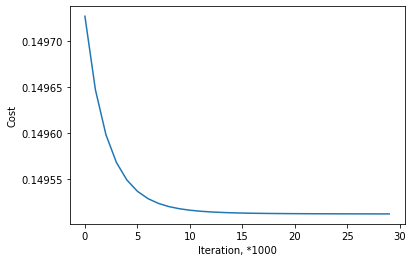

Wall time: 4.71 s


In [228]:
%%time
# from NeuralNetwork import NeuralNet
print(Y_train.shape)
#, optimization='momentum', momentum=0.9
cls = NeuralNet((50, ), normalize=False, learning_rate=0.1, num_iter = 30, batch_size=4096)
print(Y_train.shape)
cls.fit(X_train, Y_train_encoded, epsilon=1e-15)

In [229]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, cls.predict(X_test), target_names=label_encoder.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       160
           comp.graphics       0.00      0.00      0.00       195
 comp.os.ms-windows.misc       0.00      0.00      0.00       197
comp.sys.ibm.pc.hardware       0.00      0.00      0.00       196
   comp.sys.mac.hardware       0.00      0.00      0.00       193
          comp.windows.x       0.00      0.00      0.00       198
            misc.forsale       0.00      0.00      0.00       195
               rec.autos       0.00      0.00      0.00       198
         rec.motorcycles       0.00      0.00      0.00       199
      rec.sport.baseball       0.00      0.00      0.00       199
        rec.sport.hockey       0.00      0.00      0.00       200
               sci.crypt       0.00      0.00      0.00       198
         sci.electronics       0.00      0.00      0.00       197
                 sci.med       0.00      0.00      0.00       198
         

C:\Users\vsere\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [212]:
# from NeuralNetwork import NeuralNet

# cls = NeuralNet((10, ), normalize=False, learning_rate=0.1, num_iter = 1)
# cls.fit(X_train, Y_train, epsilon=1e-15)